In [1]:
import numpy as np

In [2]:
import pandas as pd

#read full metadata file
metadata = pd.read_csv("./fma_metadata/tracks.csv", skiprows=[0,2], low_memory=False)

In [3]:
metadata = metadata[metadata["subset"].eq("small")]
metadata = metadata.rename(columns={"Unnamed: 0": "track_id"})

In [4]:
print(metadata.columns)
print(metadata.shape)
# print(metadata.head())

Index(['track_id', 'comments', 'date_created', 'date_released', 'engineer',
       'favorites', 'id', 'information', 'listens', 'producer',
       ...
       'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97',
       'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101',
       'Unnamed: 102', 'Unnamed: 103'],
      dtype='object', length=104)
(7989, 104)


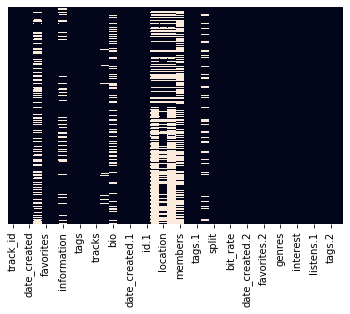

In [9]:
import seaborn as sns
sns.heatmap(metadata.isna(), yticklabels=False, cbar=False)

In [6]:
missing_value_drop_threshold = 0.7
metadata_missing = metadata.isna().sum() / metadata.shape[0]
metadata.drop(metadata_missing[metadata_missing > missing_value_drop_threshold].index, axis = 1, inplace = True)

In [7]:
print(metadata.columns)

Index(['track_id', 'comments', 'date_created', 'date_released', 'favorites',
       'id', 'information', 'listens', 'tags', 'title', 'tracks', 'type',
       'bio', 'comments.1', 'date_created.1', 'favorites.1', 'id.1',
       'latitude', 'location', 'longitude', 'members', 'name', 'tags.1',
       'website', 'split', 'subset', 'bit_rate', 'comments.2',
       'date_created.2', 'duration', 'favorites.2', 'genre_top', 'genres',
       'genres_all', 'interest', 'license', 'listens.1', 'number', 'tags.2',
       'title.1'],
      dtype='object')


In [8]:
metadata.head()
train_data = metadata.drop(['id', 'genres', 'genres_all'] ,axis = 1)

In [10]:
# print(train_data.columns)
# display(train_data.head())
display(train_data[['title', 'tracks', 'type',
       'bio',
       'latitude', 'location', 'longitude', 'members', 'name', 
       'website', 'split', 'bit_rate',
        'duration', 'genre_top']])


,title,tracks,type,bio,latitude,location,longitude,members,name,website,split,bit_rate,duration,genre_top
0,AWOL - A Way Of Life,7,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,http://www.AzillionRecords.blogspot.com,training,256000,168,Hip-Hop
2,AWOL - A Way Of Life,7,Album,"<p>A Way Of Life, A Collective of Hip-Hop from...",40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,http://www.AzillionRecords.blogspot.com,training,256000,206,Hip-Hop
3,Constant Hitmaker,2,Album,"<p><span style=""font-family:Verdana, Geneva, A...",NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,http://kurtvile.com,training,192000,161,Pop
15,The Blind Spot,1,Album,<p>The Eyesores originally formed in 1997 orig...,41.8239891,"Providence, RI",-71.4128343,NaN,Alec K. Redfearn & the Eyesores,http://www.aleckredfearn.com,training,128000,253,Folk
16,Every Man For Himself,2,Album,<p>The Eyesores originally formed in 1997 orig...,41.8239891,"Providence, RI",-71.4128343,NaN,Alec K. Redfearn & the Eyesores,http://www.aleckredfearn.com,training,128000,182,Folk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135602,Journey,18,Album,<p>Fleslit is a producer (also known as Brando...,NaN,Hong Kong,NaN,Brandon Welch,Fleslit,https://soundcloud.com/fleslit,test,320000,194,Hip-Hop
135603,Journey,18,Album,<p>Fleslit is a producer (also known as Brando...,NaN,Hong Kong,NaN,Brandon Welch,Fleslit,https://soundcloud.com/fleslit,test,320000,162,Hip-Hop
135704,Live at WFMU for Dark Night of the Soul wtih J...,11,Live Performance,<p>Tasseomancy is the musical project of siste...,NaN,"Toronto, Ontario",NaN,Romy Lightman\nSari Lightman\nEleven Cartwrigh...,Tasseomancy,https://tasseomancy.bandcamp.com/,training,320000,349,Pop
135705,Live at WFMU for Dark Night of the Soul wtih J...,11,Live Performance,<p>Tasseomancy is the musical project of siste...,NaN,"Toronto, Ontario",NaN,Romy Lightman\nSari Lightman\nEleven Cartwrigh...,Tasseomancy,https://tasseomancy.bandcamp.com/,training,320000,346,Pop


In [11]:
from sklearn import preprocessing
X = train_data.drop('genre_top', axis = 1)
le = preprocessing.LabelEncoder()


for name in X.columns:
    if X[name].dtypes == "O":
        X[name] = X[name].astype(str)
        le.fit(X[name])
        X[name] = le.transform(X[name])

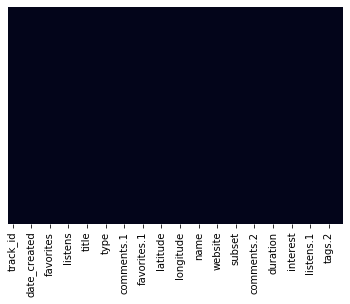

In [12]:
X.fillna(method='bfill', inplace=True)
X.fillna(method='ffill', inplace=True)
sns.heatmap(X.isna(), yticklabels=False, cbar=False)

In [13]:
# x = X.drop(['track_id', 'information','subset'],axis = 1)
# x = X[['comments', 'date_created', 'date_released', 'favorites',
#     'information', 'listens', 'tags', 'title', 'tracks', 'type',
#        'bio', 'comments.1', 'date_created.1', 'favorites.1',
#        'latitude', 'location', 'longitude', 'members', 'name', 'tags.1',
#        'website', 'split', 'bit_rate', 'comments.2',
#        'date_created.2', 'duration', 'favorites.2',
#     'interest', 'license', 'listens.1', 'number', 'tags.2',
#        'title.1']]
# x = X
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(X, train_data['genre_top'])

C:\Users\dclay\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [24] are constant.
  UserWarning)
C:\Users\dclay\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [14]:
f_score_indexes = (-selector.scores_).argsort()[:10]
x = X[X.columns[f_score_indexes]]

In [15]:
from sklearn.model_selection import train_test_split
from ast import literal_eval

y_lab = np.array(train_data['genre_top'],dtype=str) #labels

#encode labels as numbers
le = preprocessing.LabelEncoder()
le.fit(y_lab)
y = le.transform(y_lab)

#train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
np.unique(y_lab)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype='<U13')

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.8425

In [170]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn.score(x_test, y_test)

0.708125

In [171]:
from keras import models
from keras import layers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
# model.add(Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
history = model.fit(x_train, y_train,
                epochs=20,
                batch_size=128)
test_loss, test_acc = model.evaluate(x_test,y_test)
print(test_acc)

Epoch 1/20
50/50 [==============================] - 0s 1ms/step - loss: 2351.9780 - accuracy: 0.1583
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 447.8646 - accuracy: 0.1853
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 393.8481 - accuracy: 0.1945
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 383.0605 - accuracy: 0.2013
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 425.0741 - accuracy: 0.1889
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 323.3566 - accuracy: 0.1975
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 280.8384 - accuracy: 0.2141
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 278.3489 - accuracy: 0.2134
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 262.5099 - accuracy: 0.2067
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 189.2116 - accuracy: 0.217